<a href="https://colab.research.google.com/github/yashmanuraj2/udacity-DS/blob/master/DSproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

cd = pd.read_csv('/content/drive/My Drive/boston/calendar.csv')
li = pd.read_csv('/content/drive/My Drive/boston/listings.csv')
rev = pd.read_csv('/content/drive/My Drive/boston/reviews.csv')

li.head()





/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,access,interaction,house_rules,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,"The bus stop is 2 blocks away, and frequent. B...","You will have access to 2 bedrooms, a living r...",NaN,Clean up and treat the home the way you'd like...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,https://a2.muscache.com/im/pictures/c0842db1-e...,31303940,https://www.airbnb.com/users/show/31303940,Virginia,2015-04-15,"Boston, Massachusetts, United States",We are country and city connecting in our deck...,NaN,NaN,NaN,f,https://a2.muscache.com/im/pictures/5936fef0-b...,https://a2.muscache.com/im/pictures/5936fef0-b...,Roslindale,1,1,"['email', 'phone', 'facebook', 'reviews']",t,f,"Birch Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,2.0,3.0,Real Bed,"{TV,""Wireless Internet"",Kitchen,""Free Parking ...",NaN,$250.00,NaN,NaN,NaN,$35.00,1,$0.00,2,1125,2 weeks ago,NaN,0,0,0,0,2016-09-06,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",Plenty of safe street parking. Bus stops a few...,Apt has one more bedroom (which I use) and lar...,"If I am at home, I am likely working in my hom...",Pet friendly but please confirm with me if the...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,https://a1.muscache.com/im/pictures/39327812/d...,2572247,https://www.airbnb.com/users/show/2572247,Andrea,2012-06-07,"Boston, Massachusetts, United States",I live in Boston and I like to travel and have...,within an hour,100%,100%,f,https://a2.muscache.com/im/users/2572247/profi...,https://a2.muscache.com/im/users/2572247/profi...,Roslindale,1,1,"['email', 'phone', 'facebook', 'linkedin', 'am...",t,t,"Pinehurst Street, Boston, MA 02131, United States",Roslindale,Roslindale,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",""Air Conditio...",NaN,$65.00,$400.00,NaN,$95.00,$10.00,0,$0.00,2,15,a week ago,NaN,26,54,84,359,2016-09-06,36,2014-06-01,2016-08-13,94.0,10.0,9.0,10.0,10.0,9.0,9.0,f,NaN,NaN,t,moderate,f,f,1

                          

```
                        THE DATA MODELLING IS DONE THROUGH CRISP DM PROCESS:
```

1. DATA UNDERSTANDING

No of rows and columns in the dataset

*   List item
*   List item



In [5]:
#rows and columns in calendar
rows_calendar=len(cd.axes[0])
col_calendar=len(cd.axes[1])
print("Number of Rows: "+str(rows_calendar))
print("Number of Columns: "+str(col_calendar))

Number of Rows: 1308890
Number of Columns: 4


In [6]:
#@rows and columns in listings
rows_listing = len(li.axes[0])
col_listings=len(li.axes[1])
print("Number of Rows: "+str(rows_listing))
print("Number of Columns: "+str(col_listings))


Number of Rows: 3585
Number of Columns: 95


In [7]:
#rows and columns in reviews
rows_rev = len(rev.axes[0])
col_rev=len(rev.axes[1])
print("Number of Rows: "+str(rows_rev))
print("Number of Columns: "+str(col_rev))

Number of Rows: 68275
Number of Columns: 6


**ANALYSIS WILL BE DONE ON LISTINGS DATA ONLY CALENDAR AND REVIEWS WILL NOT BE CONSIDERED**

# New Section
DATA UNDERSTANDING - PART 2

In [8]:
#columns with no null values
no_nulls1 = set(cd.columns[cd.isnull().mean()==0])
no_nulls2= set(li.columns[li.isnull().mean()==0])
no_nulls3 = set(rev.columns[rev.isnull().mean()==0])
print(no_nulls1)
print(no_nulls2)
print(no_nulls3)

{'listing_id', 'date', 'available'}
{'latitude', 'host_id', 'availability_30', 'extra_people', 'host_is_superhost', 'calendar_last_scraped', 'minimum_nights', 'country', 'bed_type', 'host_verifications', 'country_code', 'smart_location', 'is_location_exact', 'calendar_updated', 'maximum_nights', 'require_guest_phone_verification', 'calculated_host_listings_count', 'require_guest_profile_picture', 'host_has_profile_pic', 'room_type', 'price', 'host_thumbnail_url', 'requires_license', 'host_name', 'instant_bookable', 'host_url', 'host_identity_verified', 'accommodates', 'cancellation_policy', 'experiences_offered', 'picture_url', 'state', 'number_of_reviews', 'host_since', 'neighbourhood_cleansed', 'description', 'host_listings_count', 'availability_365', 'guests_included', 'availability_60', 'scrape_id', 'availability_90', 'host_total_listings_count', 'amenities', 'longitude', 'listing_url', 'name', 'last_scraped', 'id', 'street', 'host_picture_url'}
{'reviewer_id', 'date', 'id', 'listi

removing cols with 75% missing values

columns with 75% of their values missing

In [9]:
most_missing_cols_cal = set(cd.columns[cd.isnull().mean() > 0.75])
most_missing_cols_lis = set(li.columns[li.isnull().mean()>0.75])
most_missing_cols_rev= set(rev.columns[rev.isnull().mean() > 0.75])


print(most_missing_cols_lis)


{'square_feet', 'monthly_price', 'jurisdiction_names', 'has_availability', 'neighbourhood_group_cleansed', 'weekly_price', 'license'}


2.**DATA WRANGLING/ DATA PREPRATION:**

1.Various columns which include duplicates , different symbols are cleansed 
2.Percentage sign and dollar signed removed from various column


3.Replacing True false values with 1 & 0 respectively in columns containing t & f

In [10]:
li.city.unique()
li.neighbourhood_cleansed.unique()
li.neighbourhood.unique()

array(['Roslindale', nan, 'Jamaica Plain', 'Mission Hill',
       'Fenway/Kenmore', 'Back Bay', 'Leather District', 'Chinatown',
       'Hyde Park', 'North End', 'Roxbury', 'South End', 'Mattapan',
       'East Boston', 'South Boston', 'Charlestown', 'West End',
       'Beacon Hill', 'Theater District', 'Downtown Crossing', 'Downtown',
       'Financial District', 'Government Center', 'Allston-Brighton',
       'West Roxbury', 'Chestnut Hill', 'Dorchester', 'Brookline',
       'Cambridge', 'Somerville', 'Harvard Square'], dtype=object)

removing duplicate cities

In [11]:
li['city_cleansed'] = li.city.copy()


In [12]:
#combining cities with same name into one 
li['city_cleansed'] = li.city_cleansed.replace('ALLSTON', 'Allston')
li['city_cleansed'] = li.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
li['city_cleansed'] = li.city_cleansed.replace('dorchester, boston ', 'Dorchester')
li['city_cleansed'] = li.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
li['city_cleansed'] = li.city_cleansed.replace('east Boston ', 'East Boston')
li['city_cleansed'] = li.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
li['city_cleansed'] = li.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
li['city_cleansed'] = li.city_cleansed.replace('Brighton ', 'Brighton')
li['city_cleansed'] = li.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [13]:
li.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       '波士顿', 'Boston, Massachusetts, US', 'South End, Boston',
       'Cambridge', 'East Boston', 'Charlestown', 'Somerville',
       'Watertown', 'Brighton', nan, 'West Roxbury', 'Newton',
       'Hyde Park', 'Mattapan', 'Milton', 'Dorchester', 'South Boston',
       'Allston'], dtype=object)

In [14]:
li['price'] = li['price'].replace({'\$': '', ',': ''}, regex=True)
li['price'] = li['price'].astype(float)

In [15]:

li['weekly_price'] = li['weekly_price'].replace({'\$': '', ',': ''}, regex=True)
li['weekly_price'] =li['weekly_price'].astype(float)

In [16]:
li['monthly_price'] = li['monthly_price'].replace({'\$': '', ',': ''}, regex=True)
li['monthly_price'] =li['monthly_price'].astype(float)

In [17]:
 li['host_acceptance_rate']= li['host_acceptance_rate'].str.rstrip('%').astype('float')

In [18]:
li['host_response_rate'] = li ['host_response_rate'].str.rstrip('%').astype('float') 

DISCLAIMER : Running the above cells more than one time will result in error due to operation being already performed on the list 

In [19]:
#creating a new data set to store the filtered data

features_df = li.copy()


In [20]:
 
num_cols =features_df.select_dtypes(include=['float', 'int']).columns
for col in num_cols:
    print(col,features_df[col].isnull().sum())
  

id 0
scrape_id 0
host_id 0
host_response_rate 471
host_acceptance_rate 471
host_listings_count 0
host_total_listings_count 0
neighbourhood_group_cleansed 3585
latitude 0
longitude 0
accommodates 0
bathrooms 14
bedrooms 10
beds 9
square_feet 3529
price 0
weekly_price 2693
monthly_price 2697
guests_included 0
minimum_nights 0
maximum_nights 0
has_availability 3585
availability_30 0
availability_60 0
availability_90 0
availability_365 0
number_of_reviews 0
review_scores_rating 813
review_scores_accuracy 823
review_scores_cleanliness 818
review_scores_checkin 820
review_scores_communication 818
review_scores_location 822
review_scores_value 821
license 3585
jurisdiction_names 3585
calculated_host_listings_count 0
reviews_per_month 756


In [23]:
# setting 1 value where minimum number of that attribute is required for the room to exist
# setting rest of the values to 0 and -1
features_df['bathrooms'] = features_df['bathrooms'].fillna(0)
features_df['bedrooms'] = features_df['bedrooms'].fillna(1)
features_df['beds'] = features_df['beds'].fillna(1)
features_df['review_scores_rating']= features_df['review_scores_rating'].fillna(0)
features_df['review_scores_accuracy'] = features_df['review_scores_accuracy'].fillna(0)
features_df['review_scores_checkin'] = features_df['review_scores_checkin'].fillna(0)
features_df['review_scores_cleanliness'] = features_df['review_scores_cleanliness'].fillna(0)
features_df['has_availability'] = features_df['has_availability'].fillna(0)
features_df['review_scores_communication'] = features_df['review_scores_communication'].fillna(0)
features_df['review_scores_location'] = features_df['review_scores_location'].fillna(0)
features_df['review_scores_value'] = features_df['review_scores_value'].fillna(0)
features_df['host_acceptance_rate'] = features_df['host_acceptance_rate'].fillna(-1)
features_df['host_response_rate'] =  features_df['host_response_rate'].fillna(-1)


                                       HANDLING AMENITIES - Storing them as a different column

In [24]:
 
features_df['TV'] = features_df.amenities.str.contains("tv", case=False)
features_df['Internet'] = features_df.amenities.str.contains('internet|wireless', case=False)
features_df['Parking'] = features_df.amenities.str.contains('parking', case=False)
features_df['Washer'] = features_df.amenities.str.contains('washer', case=False)
features_df['Dryer'] = features_df.amenities.str.contains('dryer', case=False)
features_df['AirCon'] = features_df.amenities.str.contains('air condition|air conditioning', case=False)

In [ ]:

# replacing t / f values with 1 , 0 converting them to numeric data type 
#replacing amenities with 0/1 instead of true false values
features_df['host_is_superhost'] = features_df['host_is_superhost'].replace('t',1)
features_df['host_is_superhost'] = features_df['host_is_superhost'].replace('f',0)
features_df['host_is_superhost'] = features_df['host_is_superhost'].astype(float)
features_df['has_availability'] = features_df['has_availability'].replace('t',1)
features_df['has_availability'] = features_df['has_availability'].replace('f',0)
features_df['has_availability'] = features_df['has_availability'].astype(float)
features_df['host_has_profile_pic'] = features_df['host_has_profile_pic'].replace('t',1)
features_df['host_has_profile_pic'] = features_df['host_has_profile_pic'].replace('f',0)
features_df['host_has_profile_pic'] = features_df['host_has_profile_pic'].astype(float)



In [ ]:
#replacing amenities with 0/1 instead of true false values

features_df['TV'] = features_df['TV'].replace('True',1)
features_df['TV'] = features_df['TV'].replace('False',1)
features_df['TV'] = features_df['TV'].astype(float)
features_df['Parking'] = features_df['Parking'].replace('True',1)
features_df['Parking'] = features_df['Parking'].replace('False',1)
features_df['Parking'] = features_df['Parking'].astype(float)
features_df['Washer'] = features_df['Washer'].replace('True',1)
features_df['Washer'] = features_df['Washer'].replace('False',1)
features_df['Washer'] = features_df['Washer'].astype(float)
features_df['Dryer'] = features_df['Dryer'].replace('True',1)
features_df['Dryer'] = features_df['Dryer'].replace('False',1)
features_df['Dryer'] = features_df['Dryer'].astype(float)
features_df['AirCon'] = features_df['AirCon'].replace('True',1)
features_df['AirCon'] = features_df['AirCon'].replace('False',1)
features_df['AirCon'] = features_df['AirCon'].astype(float)

Storing the cleansed data into a separate list
 (NOT including string values)

In [ ]:
new_list = features_df[['bathrooms','bedrooms','beds','review_scores_rating','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
'review_scores_location','review_scores_value','host_acceptance_rate','host_response_rate','TV','Internet','Parking','Washer','Dryer','AirCon','host_is_superhost',
'has_availability','host_has_profile_pic','accommodates','price']]



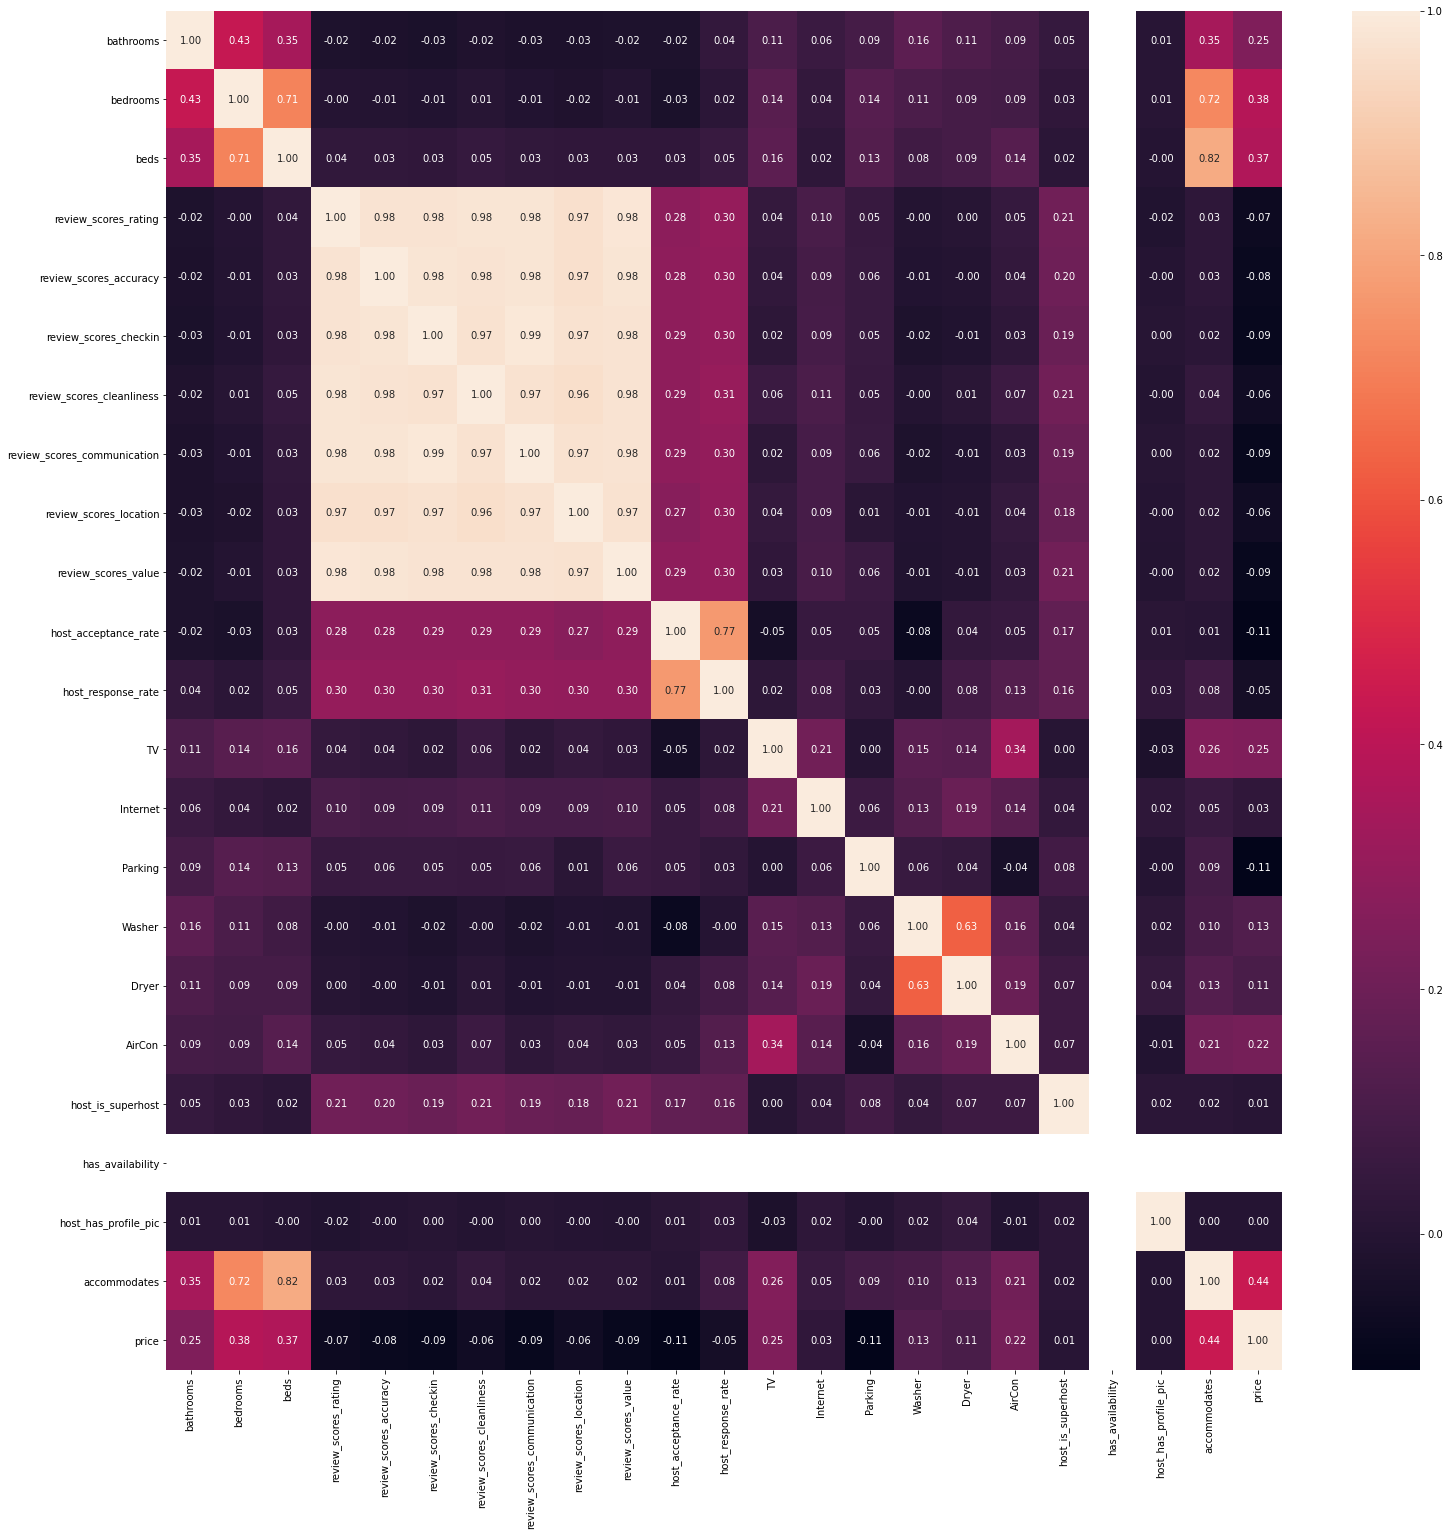

In [ ]:
# a heatmap to get a general idea of how various factors are related to each other
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(25,25))
sns.heatmap(new_list.corr(), annot=True, fmt='.2f');

                         We can see that correlation of price is highest with accomodates

SOME BASIC DATA EXPLORATION PERFORMED ON THE DATA 

In [ ]:
#Basic Data exploration
prices_data = li.groupby(['property_type','room_type']).price.mean()
prices_data

property_type    room_type      
Apartment        Entire home/apt    222.479025
                 Private room        98.726463
                 Shared room         84.596774
Bed & Breakfast  Entire home/apt    142.500000
                 Private room       130.921053
                 Shared room         44.000000
Boat             Entire home/apt    265.200000
                 Private room       287.000000
Camper/RV        Entire home/apt     60.000000
Condominium      Entire home/apt    234.640000
                 Private room       109.000000
                 Shared room         70.000000
Dorm             Private room        62.500000
Entire Floor     Entire home/apt    154.000000
                 Private room        90.000000
Guesthouse       Entire home/apt    289.000000
House            Entire home/apt    276.337838
                 Private room        80.246914
                 Shared room         62.333333
Loft             Entire home/apt    217.068966
                 Private ro

simple bed and breakfast shared room being the cheapest
where as 
entire home/apt and (other category) being the costliest

In [ ]:
room_type_count = features_df.room_type.value_counts()
print(room_type_count)

Entire home/apt    2127
Private room       1378
Shared room          80
Name: room_type, dtype: int64


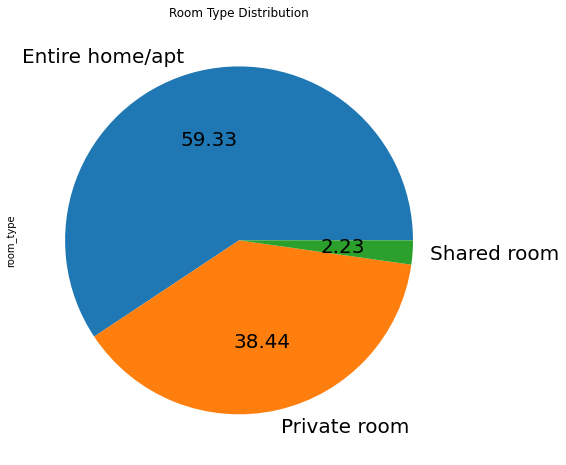

In [ ]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');


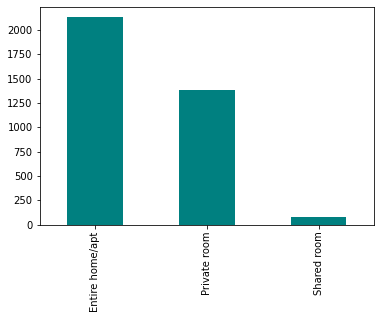

In [ ]:

room_type_count.plot(kind='bar', color='teal');

 Average price per city

In [ ]:
prices_city = features_df.groupby(['city_cleansed']).price.mean()
prices_city

city_cleansed
Allston                       86.357143
Boston                       176.718593
Boston, Massachusetts, US     50.000000
Brighton                     107.250000
Brookline                    135.888889
Cambridge                    199.375000
Charlestown                  258.625000
Dorchester                    74.000000
East Boston                  121.000000
Hyde Park                     77.500000
Jamaica Plain                157.200000
Jamaica Plain, MA            120.000000
Mattapan                      85.000000
Milton                        50.000000
Mission Hill, Boston          85.000000
Newton                        90.000000
Roslindale                    99.714286
Roxbury Crossing              94.392857
Somerville                    91.947368
South Boston                 132.000000
South End, Boston            450.000000
Watertown                     60.000000
West Roxbury                  85.600000
波士顿                          100.000000
Name: price, dtype: float6

south end boston is the costliest 
where as boston is the cheapest

In [ ]:

property_type_count = features_df.property_type.value_counts()
print(property_type_count)

Apartment          2612
House               562
Condominium         231
Townhouse            54
Bed & Breakfast      41
Loft                 39
Other                17
Boat                 12
Villa                 6
Entire Floor          4
Dorm                  2
Camper/RV             1
Guesthouse            1
Name: property_type, dtype: int64


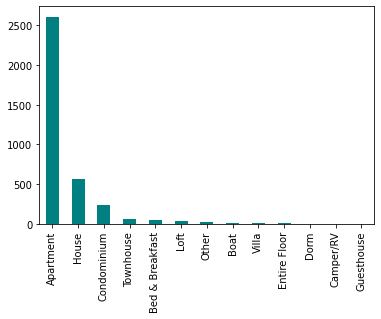

In [ ]:
property_type_count.plot(kind='bar', color='teal');

Apartments are the most in number whereas camper/Rv are the least

             **WHAT ARE THE FACTORS THAT RELATE WITH THE SUPERHOST**


Question 1:
Among the AMenities what are the strongest factor that relate with the superhost

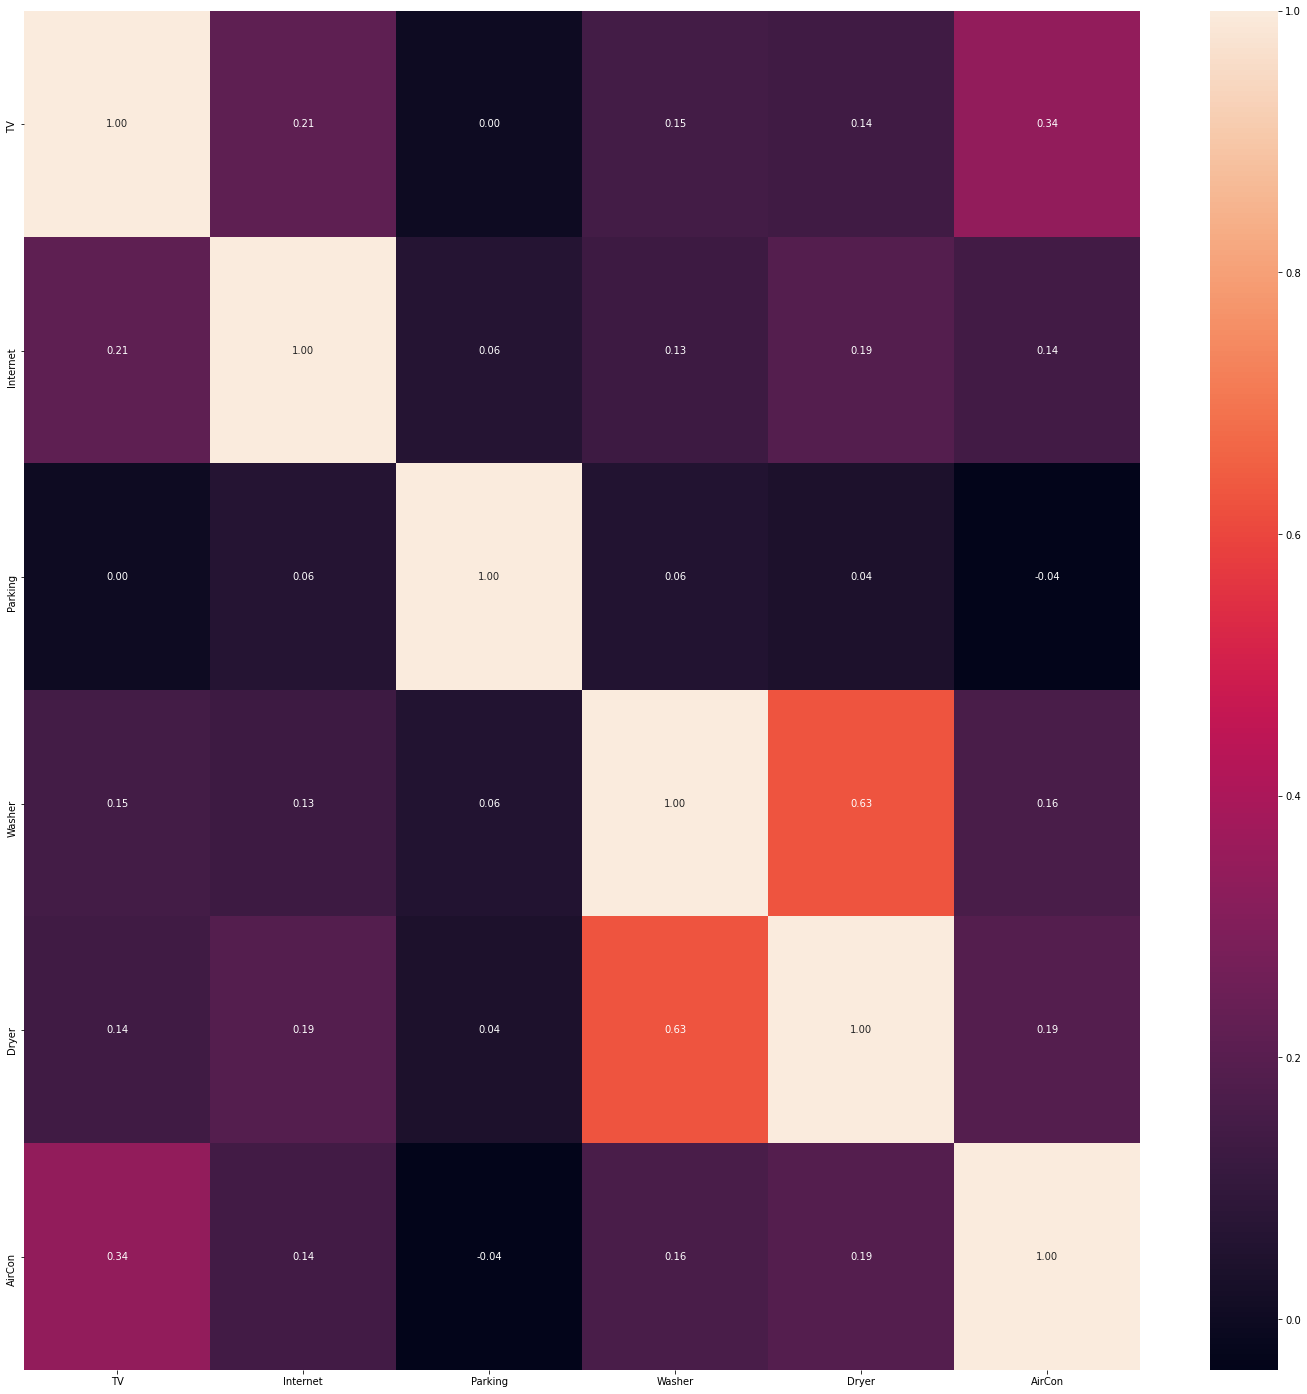

In [25]:

#plotting heatmap between amenities and host_is_superhost


new_list1 = features_df[['TV','Internet','Parking','Washer','Dryer','AirCon','host_is_superhost']]
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(25,25))
sns.heatmap(new_list1.corr(), annot=True, fmt='.2f');

WE  can see that superhost is more strongly related  with parking than other factors in the list

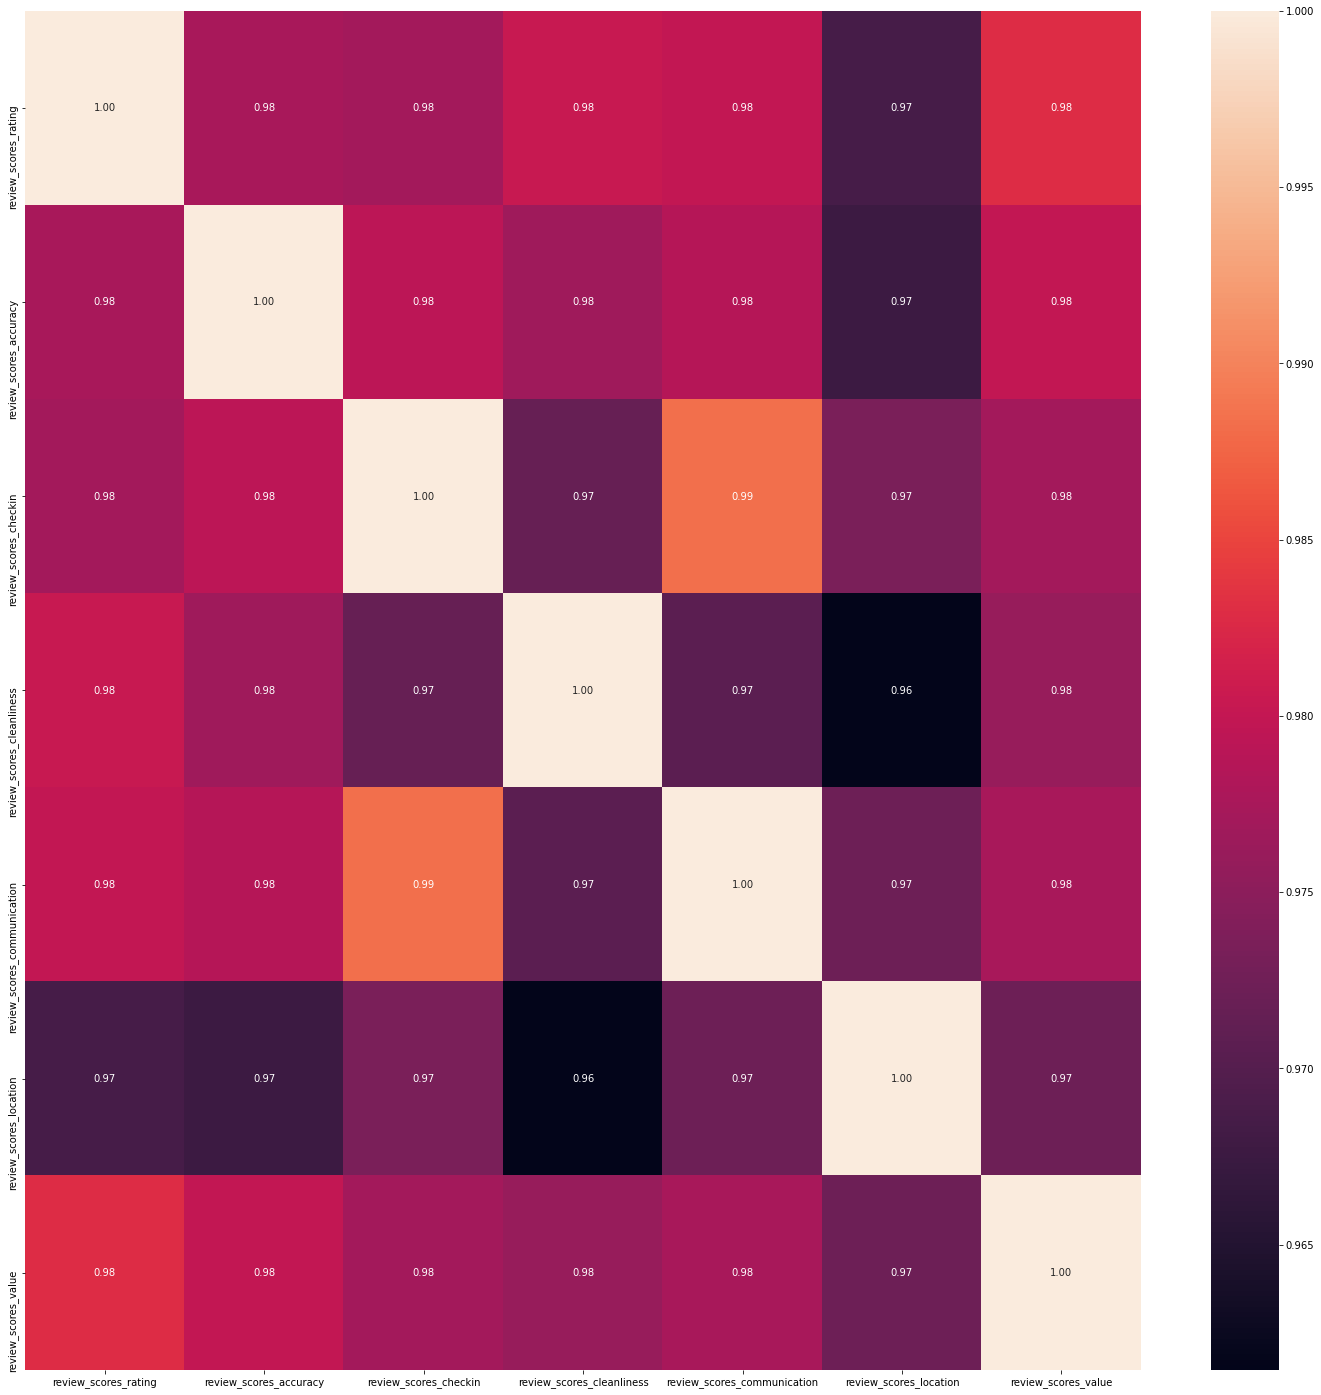

In [26]:
#Question 2.
#Among  Different reviews what are the factors that Strongly relate with the superhost being a superhost

sup_list = features_df[['host_is_superhost','review_scores_rating','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
'review_scores_location','review_scores_value']]
import matplotlib as plt
fig, ax = plt.pyplot.subplots(figsize=(25,25))
sns.heatmap(sup_list.corr(), annot=True, fmt='.2f');


WE can conclude from the above heatmap that cleanliness , value , overall ratings are an important factor in deciding a superhost and are strongly related with it, Although there is a very slight difference between the factors so we cant tell decisively

The reviews with NAN values are now replaced with mean which were earlier replaced with 0 to get a better idea of the correlation matrix 

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https

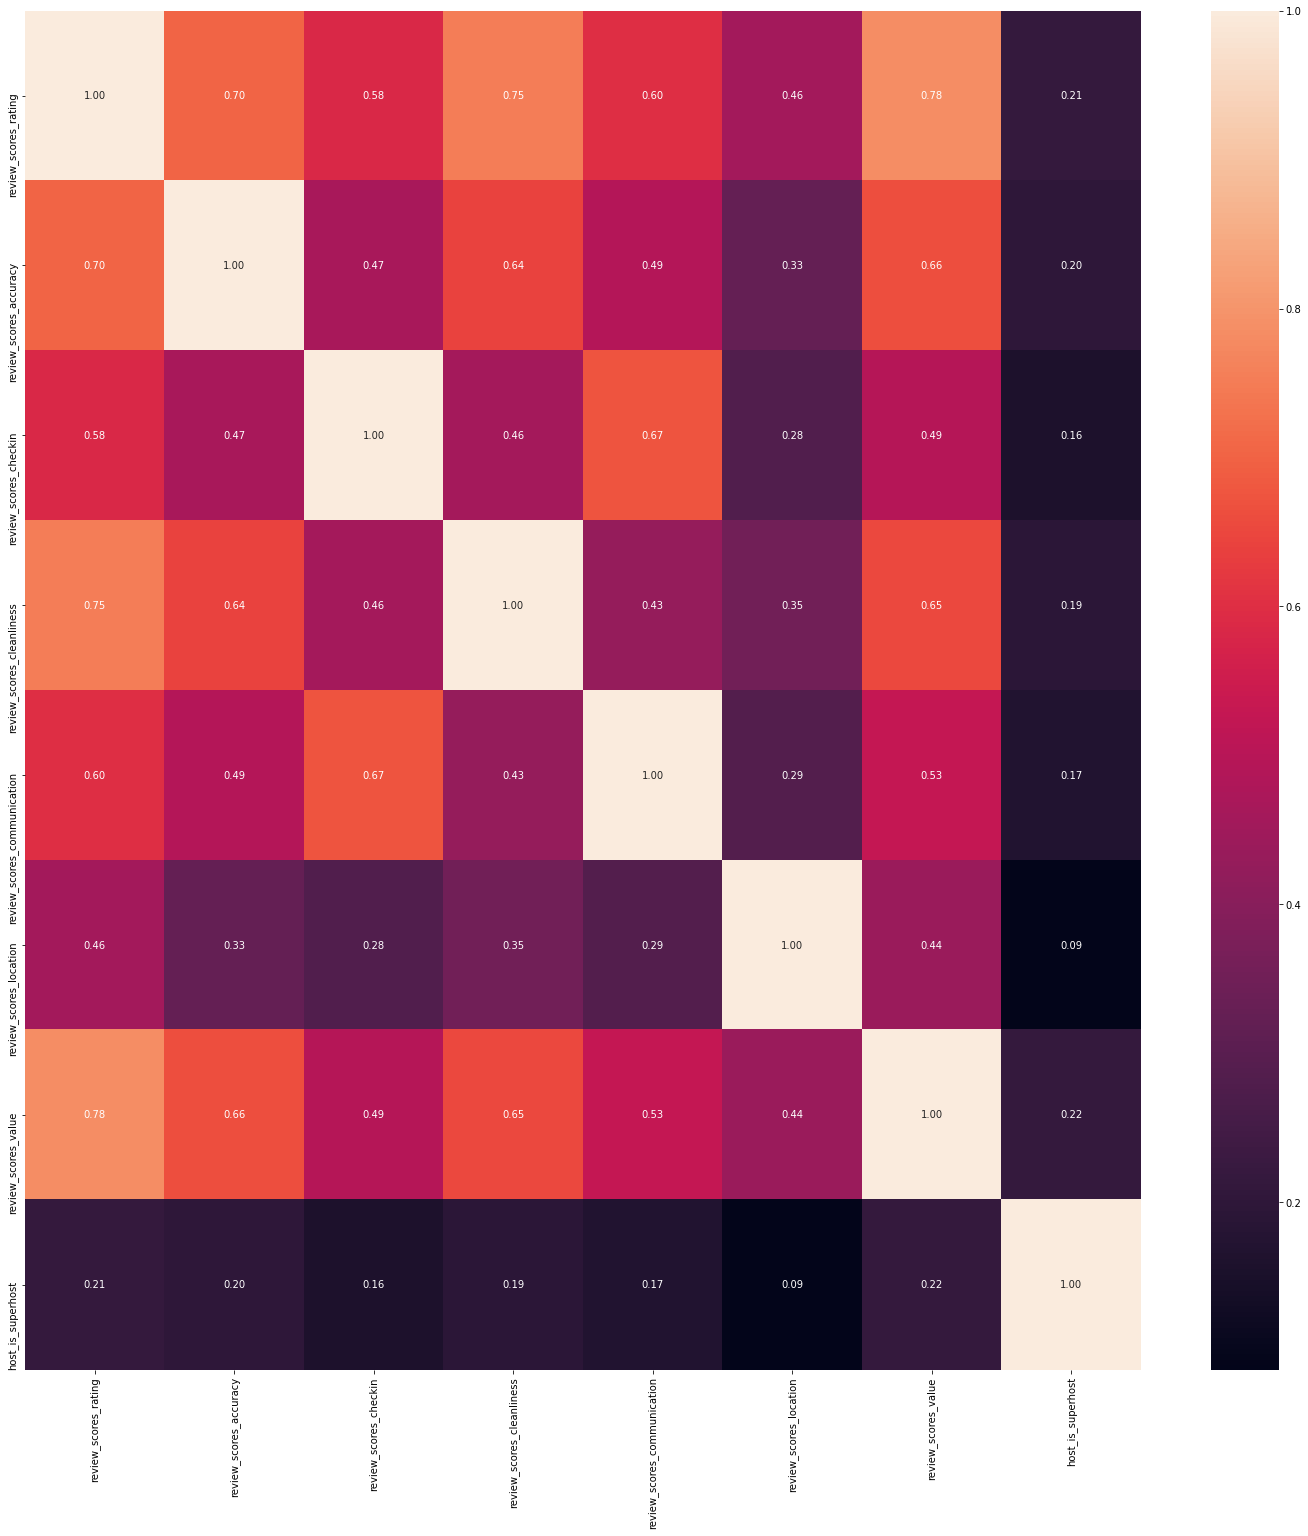

In [27]:
# Creating a seperate data frame to replace NAN reviews with mean value and compare it with superhosts

#Previously all the Nan values were replaced with 0 
X1 = li[['review_scores_rating','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
'review_scores_location','review_scores_value','host_is_superhost']]
num_vars = X1.select_dtypes(include=['int', 'float']).columns
for col in num_vars:
        X1[col].fillna((X1[col].mean()), inplace=True)
  # some data cleaning
   # replacing t with 1 and f with 0     
X1['host_is_superhost'] = X1['host_is_superhost'].replace('t',1)
X1['host_is_superhost'] = X1['host_is_superhost'].replace('f',0)

fig, ax = plt.pyplot.subplots(figsize=(25,25))
sns.heatmap(X1.corr(), annot=True, fmt='.2f');


Being a superhost strongly relates with review values and  review rating after imputing the NAn values with the mean

Comparing pricing of superhosts with non superhosts

In [28]:

# average price of superhosts vs non_ superhosts
sup_price = features_df.groupby(['host_is_superhost']).price.mean()
pd.options.display.max_rows = 4000
sup_price

host_is_superhost
f    173.604468
t    176.434889
Name: price, dtype: float64

superhosts are costlier than non-superhosts

3 >  DATA MODELLING :

In [ ]:
#has_avialabilty, weekly_price, monthly_price contains more than 75% nan values and is not considered in predicting the model
f_data = new_list[['bathrooms','bedrooms','beds','review_scores_rating','review_scores_accuracy','review_scores_checkin','review_scores_cleanliness','review_scores_communication',
'review_scores_location','review_scores_value','accommodates','price','host_acceptance_rate','host_response_rate','host_is_superhost',
'host_has_profile_pic','accommodates','price','TV','AirCon','Washer','Dryer','Parking']]



In [ ]:
#dropping all rows corresponding to 0 Price

new_list11 = f_data.dropna(subset=['price'], axis=0)



In [ ]:
X= new_list11.drop(['price'], axis =1)
y = new_list11['price']


4.1 > DATA EVALUATION 

In [ ]:

#Training a linear regression model with train and test split data with 70% and 30% respectively


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(2509, 21) (2509, 2)
(1076, 21) (1076, 2)


4.2 DATA EVALUATION

In [ ]:
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
        
# Predict and score the model
y_train_preds = lm_model.predict(X_train)
y_test_preds = lm_model.predict(X_test) 
train_score = r2_score(y_train, y_train_preds)
test_score = r2_score(y_test,y_test_preds)
print(lm_model.fit(X_train, y_train))
print("The rsquared score on the training data was {}.  The rsquared score on the test data was {}.".format(train_score, test_score))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)
The rsquared score on the training data was 0.3195836539635576.  The rsquared score on the test data was 0.2294487987870666.


OUR model has 31% variation of pricing on training data whereas 22 % variation on test data